In [1]:
import numpy as np
import scipy.fft as fft
from time import time
import matplotlib.pyplot as plt

In [2]:
def DFT(x):

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

In [3]:
def IDFT(y):
    
    N = len(y)
    y.imag = y.imag * (-1)
    res = DFT(y)
    res.imag = res.imag * (-1)
    res = res/N
    return res
    

In [4]:
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5, -0.5])
res1 = DFT(x)
print(res1)

[ 4. +0.00000000e+00j  1.5-1.73205081e+00j -2. -2.59807621e+00j
  3. +2.29652224e-15j -2. +2.59807621e+00j  1.5+1.73205081e+00j]


In [5]:
rev = IDFT(res1)

In [6]:
print(rev)

[ 1. -4.44089210e-16j  2. -2.77555756e-16j  1. -1.48029737e-16j
 -1. +3.33066907e-16j  1.5+1.33226763e-15j -0.5+1.70234197e-15j]


In [7]:
res2 = fft.fft(x)
print(res2)

[ 4. -0.j          1.5-1.73205081j -2. -2.59807621j  3. -0.j
 -2. +2.59807621j  1.5+1.73205081j]


In [8]:
rev2 = fft.ifft(res2)
print(rev2)

[ 1. +0.j  2. +0.j  1. +0.j -1. +0.j  1.5-0.j -0.5+0.j]


In [9]:
np.allclose(rev, rev2)

True

In [10]:
np.allclose(res1, res2)

False

In [11]:
def FFT(x):
    N = len(x)
    if N % 2 != 0:
        return None
    if N <= 32:
        return fft.fft(x)
    even_x = FFT(x[::2])
    odd_x = FFT(x[1::2])
    factor = np.exp(-2j * np.pi * np.arange(N) / N)
    fst = even_x + factor[:N // 2] * odd_x
    scnd = even_x + factor[N // 2:] * odd_x
    return np.concatenate([fst, scnd])

In [12]:
res3 = FFT(x)
print(res3)

[ 4. -0.j          1.5-1.73205081j -2. -2.59807621j  3. -0.j
 -2. +2.59807621j  1.5+1.73205081j]


In [13]:
x2 = np.random.random(1024)
FFT(x2)

array([511.03694832+0.j        ,  -0.91530911+5.63622451j,
        -9.79891702-8.30661034j, ...,  -3.38832388+4.91466841j,
        -9.79891702+8.30661034j,  -0.91530911-5.63622451j])

In [14]:
DFT(x2)

array([511.03694832+0.j        ,  -0.91530911+5.63622451j,
        -9.79891702-8.30661034j, ...,  -3.38832388+4.91466841j,
        -9.79891702+8.30661034j,  -0.91530911-5.63622451j])

In [15]:
fft.fft(x2)

array([511.03694832-0.j        ,  -0.91530911+5.63622451j,
        -9.79891702-8.30661034j, ...,  -3.38832388+4.91466841j,
        -9.79891702+8.30661034j,  -0.91530911-5.63622451j])

In [16]:
np.allclose(FFT(x2), DFT(x2))

True

In [17]:
np.allclose(FFT(x2), fft.fft(x2))

True

In [18]:
np.allclose(DFT(x2), fft.fft(x2))

True

In [19]:
def test_speed(s_range, e_range, step):
    results_dft = []
    results_lib = []
    results_fft = []
    for i in range(s_range, e_range + 1, step):
        x = np.random.random(i)
        # DFT
        s1 = time()
        DFT(x)
        e1 = time()
        results_dft.append(e1 - s1)
        # FFT
        s2 = time()
        FFT(x)
        e2 = time()
        results_fft.append(e2 - s2)
        # LIB
        s3 = time()
        fft.fft(x)
        e3 = time()
        results_lib.append(e3 - s3)
    return results_dft, results_fft, results_lib    
        

In [20]:
r1, r2, r3 = test_speed(1024, 10000, 1024)

In [21]:
ran = np.arange(1024, 10000, 1024)

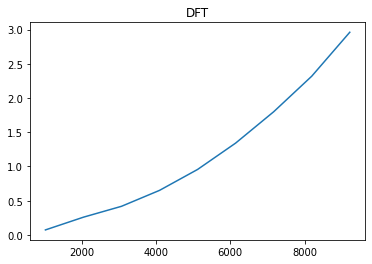

In [22]:
plt.title("DFT")
plt.plot(ran, r1)
plt.show()

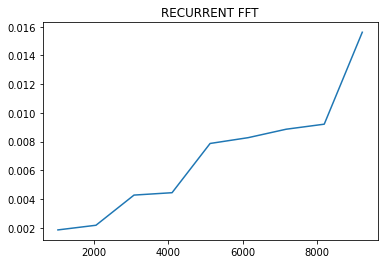

In [23]:
plt.title("RECURRENT FFT")
plt.plot(ran, r2)
plt.show()

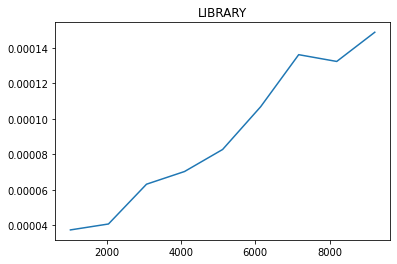

In [24]:
plt.title("LIBRARY")
plt.plot(ran, r3)
plt.show()

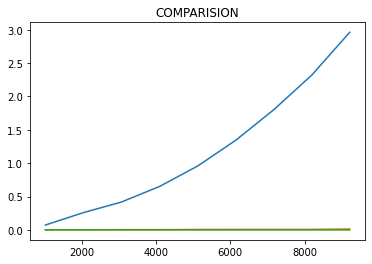

In [25]:
plt.title("COMPARISION")
plt.plot(ran, r1, ran, r2, ran, r3)
plt.show()

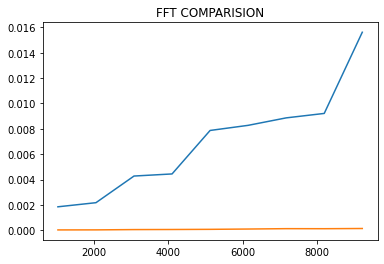

In [26]:
plt.title("FFT COMPARISION")
plt.plot(ran, r2, ran, r3)
plt.show()

## ZAD 2

In [27]:
sig_range = np.arange(0, 8 * np.pi, 0.01)
sig1 = np.array([3 * np.sin(xi) for xi in sig_range])
sig2 = np.array([0.5 * np.sin(2*xi) for xi in sig_range])
sig3 = np.array([np.sin(5*xi) for xi in sig_range])
sig4 = np.array([4 * np.sin(10*xi) for xi in sig_range])
sig5 = np.array([np.pi * np.sin(0.5*xi * np.pi) for xi in sig_range])

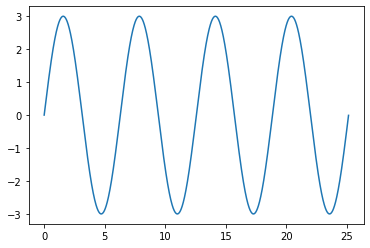

In [28]:
plt.plot(sig_range, sig1)

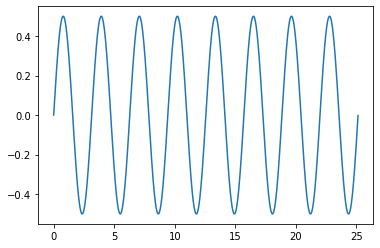

In [29]:
plt.plot(sig_range, sig2)

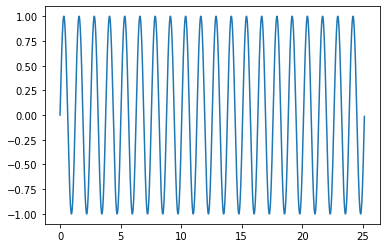

In [30]:
plt.plot(sig_range, sig3)

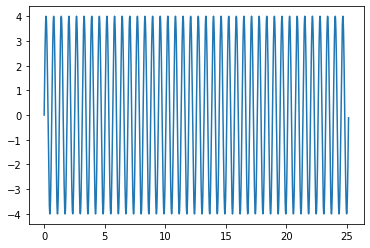

In [31]:
plt.plot(sig_range, sig4)

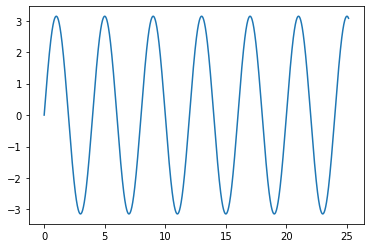

In [32]:
plt.plot(sig_range, sig5)

In [33]:
sum_sig = sig1 + sig2 + sig3 + sig4 + sig5

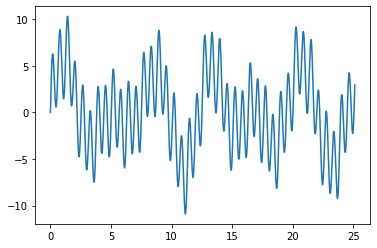

In [34]:
plt.plot(sig_range, sum_sig)

In [35]:
res_sig = fft.fft(sum_sig)

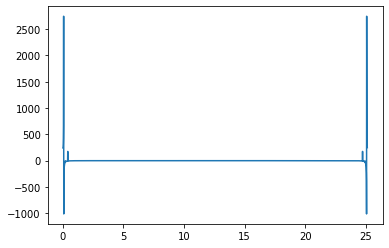

In [36]:
plt.plot(sig_range, res_sig.real)

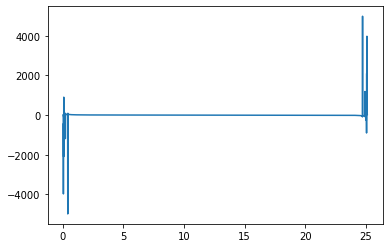

In [37]:
plt.plot(sig_range, res_sig.imag)

In [38]:
points = len(sig_range)//5
sig_sum2 = np.array([sig1[i] for i in range(0, points)] + [sig2[i] for i in range(points, points*2)] + [sig3[i] for i in range(points*2, points*3)] + [sig4[i] for i in range(points*3, points*4)] + [sig5[i] for i in range(points*4, len(sig_range))])

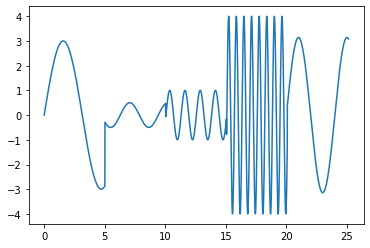

In [39]:
plt.plot(sig_range, sig_sum2)

In [40]:
sig_res2 = fft.fft(sig_sum2)

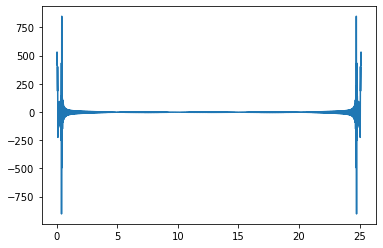

In [41]:
plt.plot(sig_range, sig_res2.real)

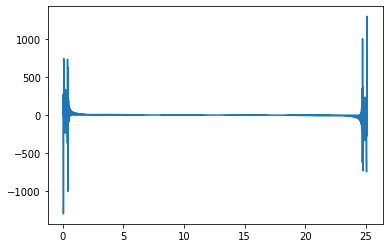

In [42]:
plt.plot(sig_range, sig_res2.imag)